In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from itertools import product
import numpy as np
from src.EModel import EModel
from src.EDistribution import EDistribution
from src.get_xy_sample import get_xy_sample
from src.config import RNG, RANDOM_STATE, GLOBAL_PATH_TO_REPO
from src.train_and_evaluate_all_models import train_and_evaluate_all_models
from src.EDistribution import EDistribution

In [71]:
df = pd.read_csv('data/proba2.csv')

In [73]:
def get_MSE(N: int, M: int):
    return df.loc[(df.N == N) & (df.M == M), 'MSE'].mean()

In [76]:
N = np.array(df.N.unique())
M = np.array(df.M.unique())
M, N = np.meshgrid(M, N)

In [77]:
get_MSE_np = np.vectorize(get_MSE)

In [81]:
MSE = get_MSE_np(M, N)

In [70]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

X**2


array([[25.    , 22.5625, 20.25  , ..., 18.0625, 20.25  , 22.5625],
       [25.    , 22.5625, 20.25  , ..., 18.0625, 20.25  , 22.5625],
       [25.    , 22.5625, 20.25  , ..., 18.0625, 20.25  , 22.5625],
       ...,
       [25.    , 22.5625, 20.25  , ..., 18.0625, 20.25  , 22.5625],
       [25.    , 22.5625, 20.25  , ..., 18.0625, 20.25  , 22.5625],
       [25.    , 22.5625, 20.25  , ..., 18.0625, 20.25  , 22.5625]])

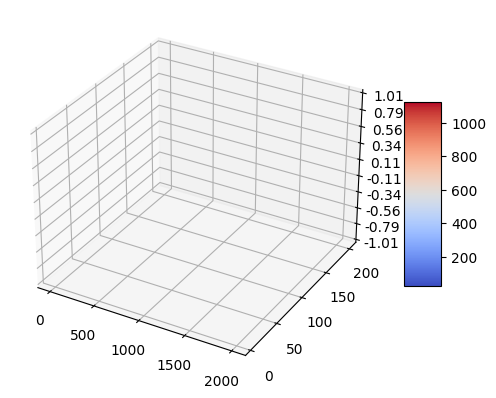

In [82]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(M, N, MSE, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)